In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def tirar_monedas(n):
  #cara: 1, sello: 0
  resultados = np.zeros(n) 
  probs = np.random.uniform(size=n)
  resultados[probs > 0.5] = 1 # si la probabilidad es mayor a 0.5 salió cara
  return resultados

In [42]:
def simulacion(n, m,punto_b=False):
  #n -> numero de monedas
  #m -> numero de veces que se tira cada moneda
  #v1 -> Fraccion de caras de la primera moneda tirada.
  #vrand -> Fraccion de caras de una moneda escogida al azar.
  #vmin -> Fraccion de caras de la moneda con menor frecuencia de caras.
    
    v1 = []
    vrand = []
    vmin = []
    
    crand = np.random.choice(n) # Escoge la moneda al azar de las n que se van a tirar para vrand
    caras = np.zeros(n) #suma de caras por cada moneda
    
    for tirada in range(m):
      # tira las n monedas m veces
        caras = caras + tirar_monedas(n)
    
    frecuenciaCaras = caras/m
    
    v1 = frecuenciaCaras[0]
    vrand = frecuenciaCaras[crand]
    cmin = np.argmin(caras)
    vmin = frecuenciaCaras[cmin]
    
    if not punto_b:
      print(f'Primera moneda: {v1}')
      print(f'Moneda al azar: {vrand} ')
      print(f'Moneda con menos caras: {vmin}')
    return v1,vrand,vmin


Punto (a) \\

 Al ser monedas justas tenemos que $\mu = 0.5$, pues estamos utilizando una distribución uniforme.



In [34]:
n = 1000
m = 10
simulacion(n, m)

Primera moneda: 0.3
Moneda al azar: 0.6 
Moneda con menos caras: 0.0


(0.3, 0.6, 0.0)

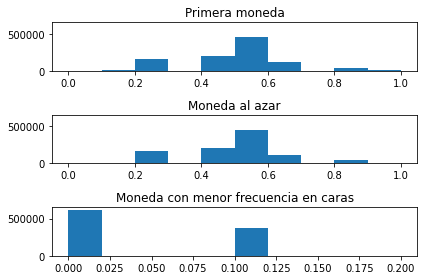

In [46]:
# Punto b
n = 1000
m = 10
ejecuciones = 1000000
v1s, vrands, vmins = [],[],[] # arreglos para guardar las frecuencias de caras de las monedas c1,rand y cmin
for run in range(ejecuciones):
    v1,vrand,vmin = simulacion(n, m,punto_b=True)
    v1s.append(v1)
    vrands.append(vrand)
    vmins.append(vmin)

fig, axs = plt.subplots(3,1,sharey=True, tight_layout=True)
n_bins = 10
axs[0].hist(v1s,bins=n_bins)
axs[1].hist(vrands,bins=n_bins)
axs[2].hist(vmins,bins=n_bins)

axs[0].set_title('Primera moneda')
axs[1].set_title('Moneda al azar')
axs[2].set_title('Moneda con menor frecuencia en caras')
plt.show()

Punto d \\
Aunque no pude realizar el punto c según la teoría vista en clase la moneda con la menor frecuencia no debería cumplir la cota de Hoeffding pues esta se escogió después de realizar el experimento y no antes como las otras dos monedas, y como ya sabemos esto viola la condición para la desigualdad de  Hoeffding que dice que la hipotesis se debe haber fijado antes de que se extraigan las muestras.

Punto e \\
Al escoger la moneda con menor frecuencia de caras es como de nuestro espacio de 1000 hipotesis o de nuestra bolsa con 1000 hipotesis tomar una hipotesis o bin (moneda con menor frecuencia de caras), estamos tomando el bin después del muestreo de los datos (error), las otras dos monedas si se tomaron antes del muestreo.



---

Ejercicio 1.11

Tenemos $f: X \to Y$ donde $X=\mathbb{R}$ y $Y=\{-1,1\}$, para aprender $f$ tenemos el siguiente espacio de hpotesis $H= \{h_{1},h_{2}\}$ donde $h_{1}$ es la función constante $+1$ y $h_{2}$ la función constante $-1$.

Punto a \\

No hay garantía que $S$ pueda producir una mejor hipotesis que tenga mejor desempeño fuera de $D$, supongamos que $f$ tiene 100 $+1$ en $D$ pero tiene $-1$ en el resto de puntos en $X$, es decir, por fuera de $D$, aqui vemos que $S$ escogerá una mala hipotesis pues nunca le dará a ningún punto, sin enmbargo el algoritmo $C$ tiene mas chances pues tiene un chance del 50% de ajustar los datos, en resumen, en este caso es mejor $C$ que $S$ por fuera de $D$.

Punto b \\
En el punto a hay un caso donde el algortimo $C$ escoge una mejor hipotesis que el algoritmo $S$.

Punto c \\
Con $p=0.9$ esta vez el algoritmo $C$ escogerá siempre una peor hipotesis que el algoritmo $S$, ya que si cada punto en $D$ es +1 según la definición de $S$ este escogerá la hipotesis $h_{1}$ y el algoritmo $C$ escogerá la hipotesis $h_{2}$, afuera de $D$, es decir, en $X-D$ la hipotesis $h_{1}$ tiene un chance del 0.9 de dar con $f$, mientras que $h_{2}$ sólo un 0.1.

Punto d \\
Se necesita que $C$ siempre escoja a $h_{2}$, esto se lograría según lo visto si $p < 0.5$, de esta manera $h_{2}$ se parecerá mucho más a $f$ que la hipotesis $h_{1}$.







